In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, HTML
pd.set_option('display.max_rows', 1000)
df = pd.read_csv('metadata.csv', low_memory=False)
df.head()

image                        label dataset  \
0  001i5ooagzm11_redt.jpg   that_wasnt_very_cash_money   valid   
1  00bppf96ge801_redt.jpg  of_course_i_know_him_hes_me   valid   
2  00gvjdi9oe421_redt.jpg                  rewind_time   valid   
3  00m3fnr54kc11_redt.jpg                   how_old_is   train   
4  00mnypugvw021_redt.jpg                 sisters_name   valid   

            section     timestamp                                  url  \
0         dankmemes  1.537270e+09  https://i.redd.it/001i5ooagzm11.jpg   
1         dankmemes  1.515224e+09  https://i.redd.it/00bppf96ge801.jpg   
2         dankmemes  1.544864e+09  https://i.redd.it/00gvjdi9oe421.jpg   
3  bonehurtingjuice  1.532726e+09  https://i.redd.it/00m3fnr54kc11.jpg   
4        FellowKids  1.543341e+09  https://i.redd.it/00mnypugvw021.jpg   

      domain   score  ncoms  gilded  nxpst   idRdt  
0  i.redd.it   461.0   30.0     0.0    0.0  9gtzug  
1  i.redd.it  3089.0   36.0     0.0    0.0  7ohvib  
2  i.redd.it  2028.0   43.0     0.0    1.0  a6dte0  
3  i.redd.it     0.0    1.0     0.0    0.0  92gg2j  
4  i.redd.it  1674.0   37.0     0.0    0.0  a0x60v

In [3]:
df['section'] = df['section'].fillna('unknown')
df_clean = df.dropna(subset=['score'])
top_memes_idx = df_clean.groupby('section')['score'].idxmax()
top_memes = df_clean.loc[top_memes_idx]
top_memes_view = top_memes[['section', 'image', 'label', 'score', 'ncoms', 'url']].copy()
top_memes_view.columns = ['Категория', 'Файл', 'Подпись', 'Лайков', 'Комментариев', 'Ссылка']
top_memes_view['Ссылка'] = top_memes_view['Ссылка'].apply(lambda url: f'<a href="{url}" target="_blank">Открыть</a>')
display(HTML(top_memes_view.to_html(escape=False, index=False)))
top_memes_view.shape()

TypeError: 'tuple' object is not callable

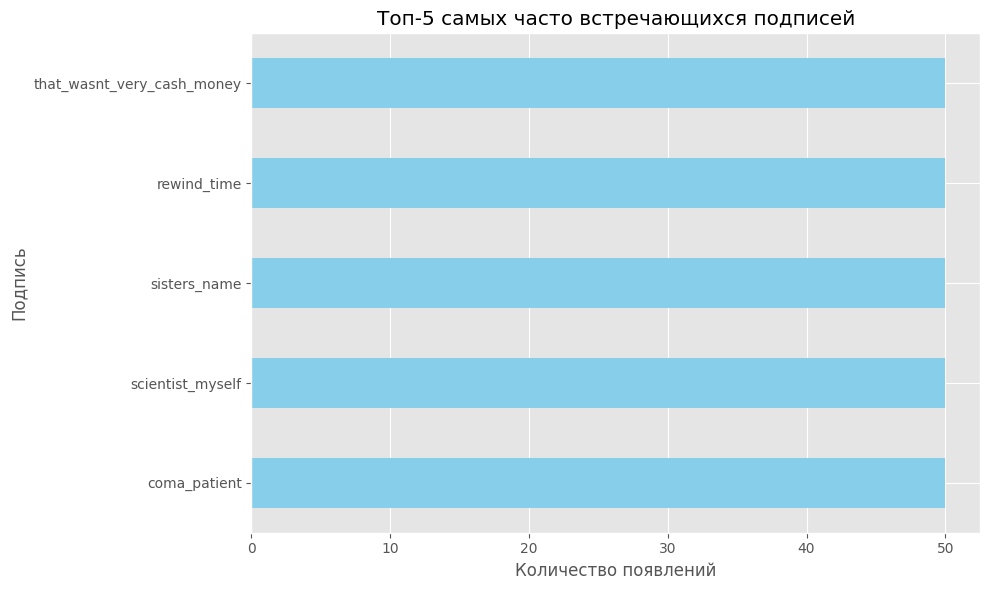

In [9]:
top_labels = df['label'].value_counts().head(5)
plt.style.use('ggplot')
top_labels.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Количество появлений')
plt.ylabel('Подпись')
plt.title('Топ-5 самых часто встречающихся подписей')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
df = df.dropna(subset=['label', 'score'])
label_counts = df['label'].value_counts()
popular_labels = label_counts[label_counts > 7].index
filtered_df = df[df['label'].isin(popular_labels)]
avg_likes_by_label = filtered_df.groupby('label')['score'].mean().sort_values(ascending=False)
print("Среднее количество лайков для популярных подписей:")
print(avg_likes_by_label)

Среднее количество лайков для популярных подписей (более 7 появлений):
label
masters_blessing                           6582.734694
joke_to_you                                6362.480000
teresea_may_dance                          6042.160000
patrick_wallet                             5714.680000
predator_epic_handshake                    4835.520000
people_with_signs                          4796.200000
thanos_strongwill                          4651.700000
jim_office_smiling                         4540.104167
other_women                                4494.020408
happy_seal                                 4336.700000
drake_pref                                 4311.510204
drew_scanlon_reaction                      4303.571429
intelligent_students_crying_kid            4068.895833
mario_bros_views                           4056.591837
double_d_fact_book                         4029.780000
paul_ryan_screen                           3965.140000
distracted_boyfriend                       

In [ ]:
df = df.dropna(subset=['label', 'score'])
label_counts = df['label'].value_counts()
popular_labels = label_counts[label_counts > 7].index
filtered_df = df[df['label'].isin(popular_labels)]
result = (
    filtered_df.groupby('label')['score']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'Среднее лайков', 'count': 'Количество появлений'})
    .sort_values(by='Среднее лайков', ascending=False)
)
print(result)

                                         Среднее лайков  Количество появлений
label                                                                        
masters_blessing                            6582.734694                    49
joke_to_you                                 6362.480000                    50
teresea_may_dance                           6042.160000                    50
patrick_wallet                              5714.680000                    50
predator_epic_handshake                     4835.520000                    50
people_with_signs                           4796.200000                    50
thanos_strongwill                           4651.700000                    50
jim_office_smiling                          4540.104167                    48
other_women                                 4494.020408                    49
happy_seal                                  4336.700000                    50
drake_pref                                  4311.510204         

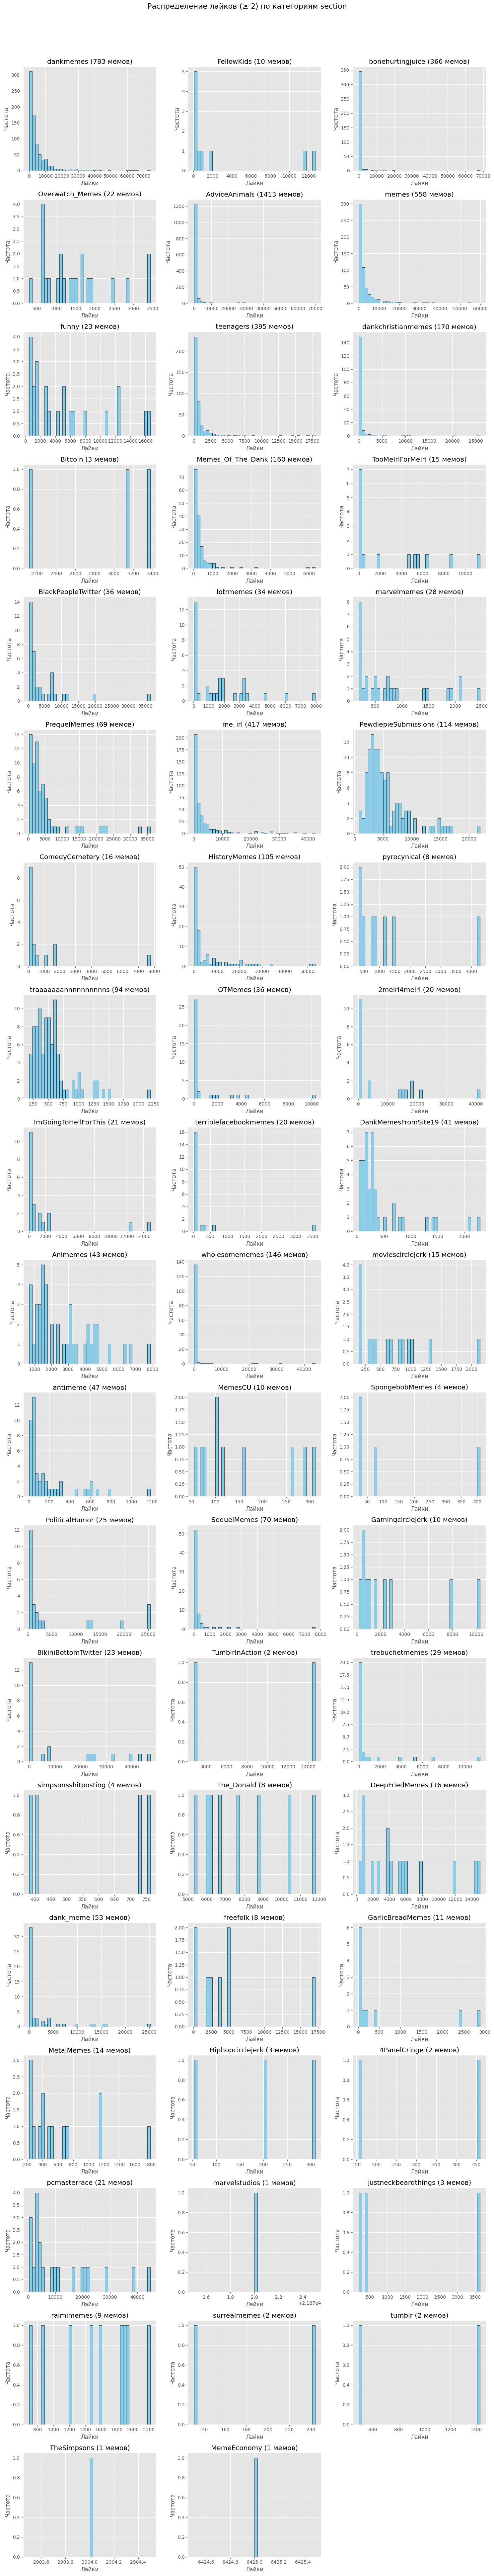

In [ ]:
df = df[df['score'] >= 2]
sections = df['section'].unique()
n = len(sections)
cols = 3
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, section in enumerate(sections):
    ax = axes[i]
    scores = df[df['section'] == section]['score'].dropna()
    ax.hist(scores, bins=40, color='skyblue', edgecolor='black')
    ax.set_title(f"{section} ({len(scores)} мемов)")
    ax.set_xlabel("Лайки")
    ax.set_ylabel("Частота")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Распределение лайков (≥ 2) по категориям section", fontsize=16, y=1.02)
plt.show()

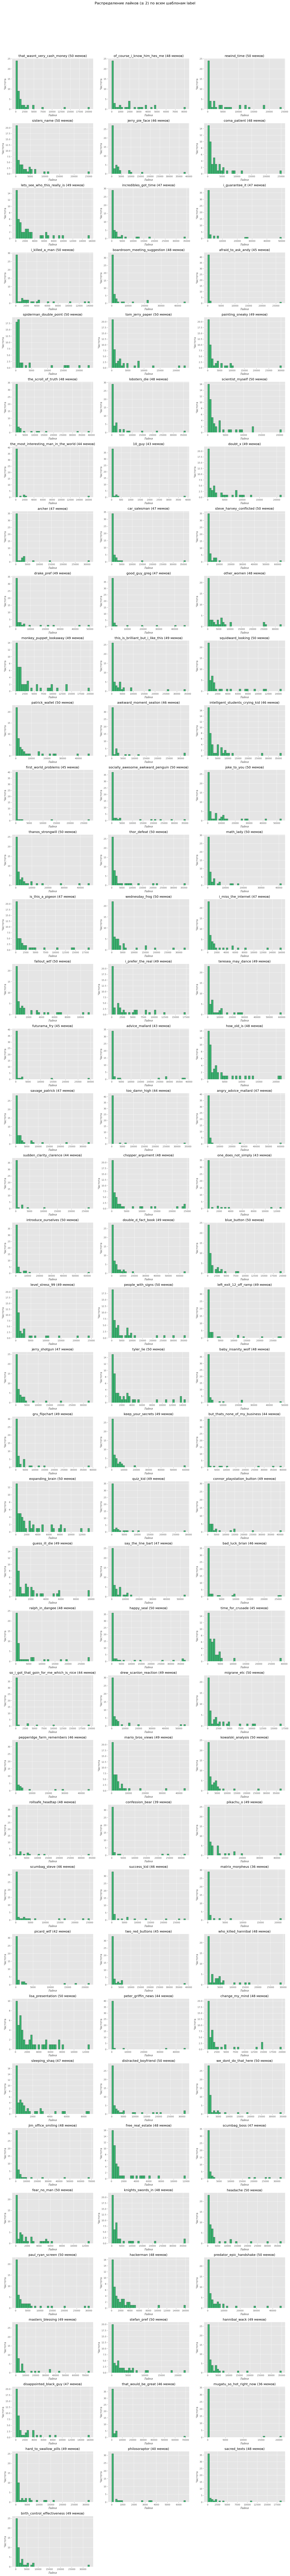

In [ ]:
df['label'] = df['label'].fillna('unknown')
df = df[df['score'] >= 5]
labels = df['label'].unique()
cols = 3
rows = (len(labels) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()
for i, label in enumerate(labels):
    scores = df[df['label'] == label]['score'].dropna()
    axes[i].hist(scores, bins=40, color='mediumseagreen', edgecolor='black')
    axes[i].set_title(f"{label} ({len(scores)} мемов)")
    axes[i].set_xlabel("Лайки")
    axes[i].set_ylabel("Частота")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Распределение лайков (≥ 2) по всем шаблонам label", fontsize=16, y=1.02)
plt.show()

Dropdown(description='Шаблон:', index=14, layout=Layout(width='50%'), options=('10_guy', 'advice_mallard', 'af…

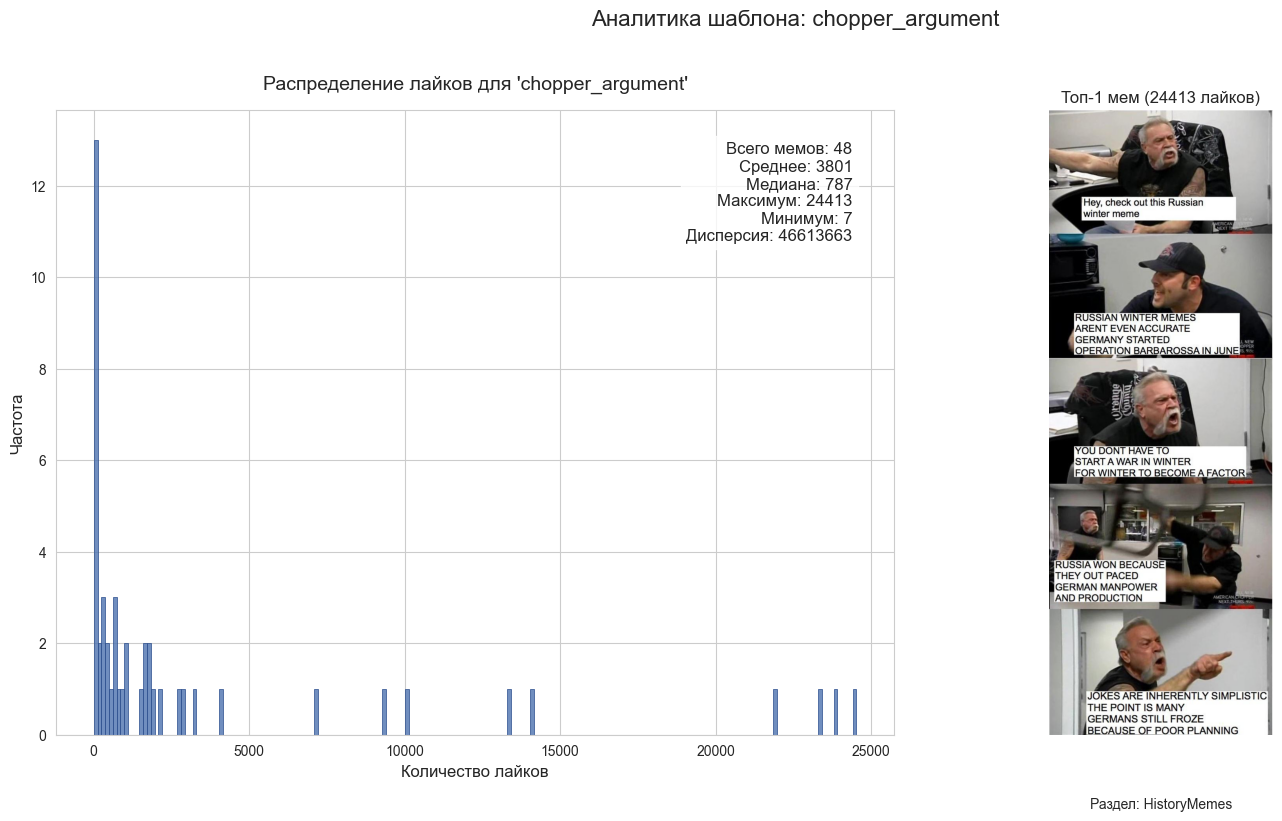

In [ ]:
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import os
df['label'] = df['label'].fillna('unknown')
df = df[df['score'] >= 2]
labels = sorted(df['label'].unique())
label_dropdown = widgets.Dropdown(
    options=labels,
    description='Шаблон:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def plot_label_distribution(label):
    clear_output(wait=True)
    display(label_dropdown)
    
    label_data = df[df['label'] == label]
    scores = label_data['score']
    plt.figure(figsize=(16, 8))
    sns.set_style("whitegrid")
    plt.subplot(1, 2, 1)
    bin_size = max(1, int((scores.max() - scores.min()) / 200))
    bins = np.arange(scores.min(), scores.max() + bin_size, bin_size)
    sns.histplot(scores, bins=bins, color='#4c72b0', 
                edgecolor='#2a4d8c', linewidth=0.5, alpha=0.8,
                kde=False)
    
    plt.title(f"Распределение лайков для '{label}'", fontsize=14, pad=15)
    plt.xlabel("Количество лайков", fontsize=12)
    plt.ylabel("Частота", fontsize=12)
    stats = {
        'Всего мемов': len(scores),
        'Среднее': int(round(scores.mean())),
        'Медиана': int(round(scores.median())),
        'Максимум': int(scores.max()),
        'Минимум': int(scores.min()),
        'Дисперсия': int(round(scores.var()))
    }
    
    stats_text = "\n".join([f"{k}: {v}" for k, v in stats.items()])
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                  ha='right', va='top', fontsize=12,
                  bbox=dict(facecolor='white', alpha=0.8))
    plt.subplot(1, 2, 2)
    
    top_meme = label_data.nlargest(1, 'score').iloc[0]
    image_path = os.path.join(top_meme['dataset'], top_meme['label'], top_meme['image'])
    
    if os.path.exists(image_path):
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.title(f"Топ-1 мем ({int(top_meme['score'])} лайков)", fontsize=12)
        plt.axis('off')
        meme_info = []
        if 'date' in df.columns:
            meme_info.append(f"Дата: {top_meme['date']}")
        if 'section' in df.columns:
            meme_info.append(f"Раздел: {top_meme['section']}")
        if 'author' in df.columns:
            meme_info.append(f"Автор: {top_meme['author']}")
        
        if meme_info:
            plt.gca().text(0.5, -0.1, "\n".join(meme_info), 
                          transform=plt.gca().transAxes,
                          ha='center', va='top', fontsize=10)
    else:
        plt.text(0.5, 0.5, f"Изображение не найдено:\n{image_path}", 
                ha='center', va='center')
        plt.axis('off')
    
    plt.suptitle(f"Аналитика шаблона: {label}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
label_dropdown.observe(lambda change: plot_label_distribution(change['new']), names='value')
display(label_dropdown)
plot_label_distribution(label_dropdown.value)

Dropdown(description='Секция:', layout=Layout(width='50%'), options=('2meirl4meirl', '4PanelCringe', 'AdviceAn…

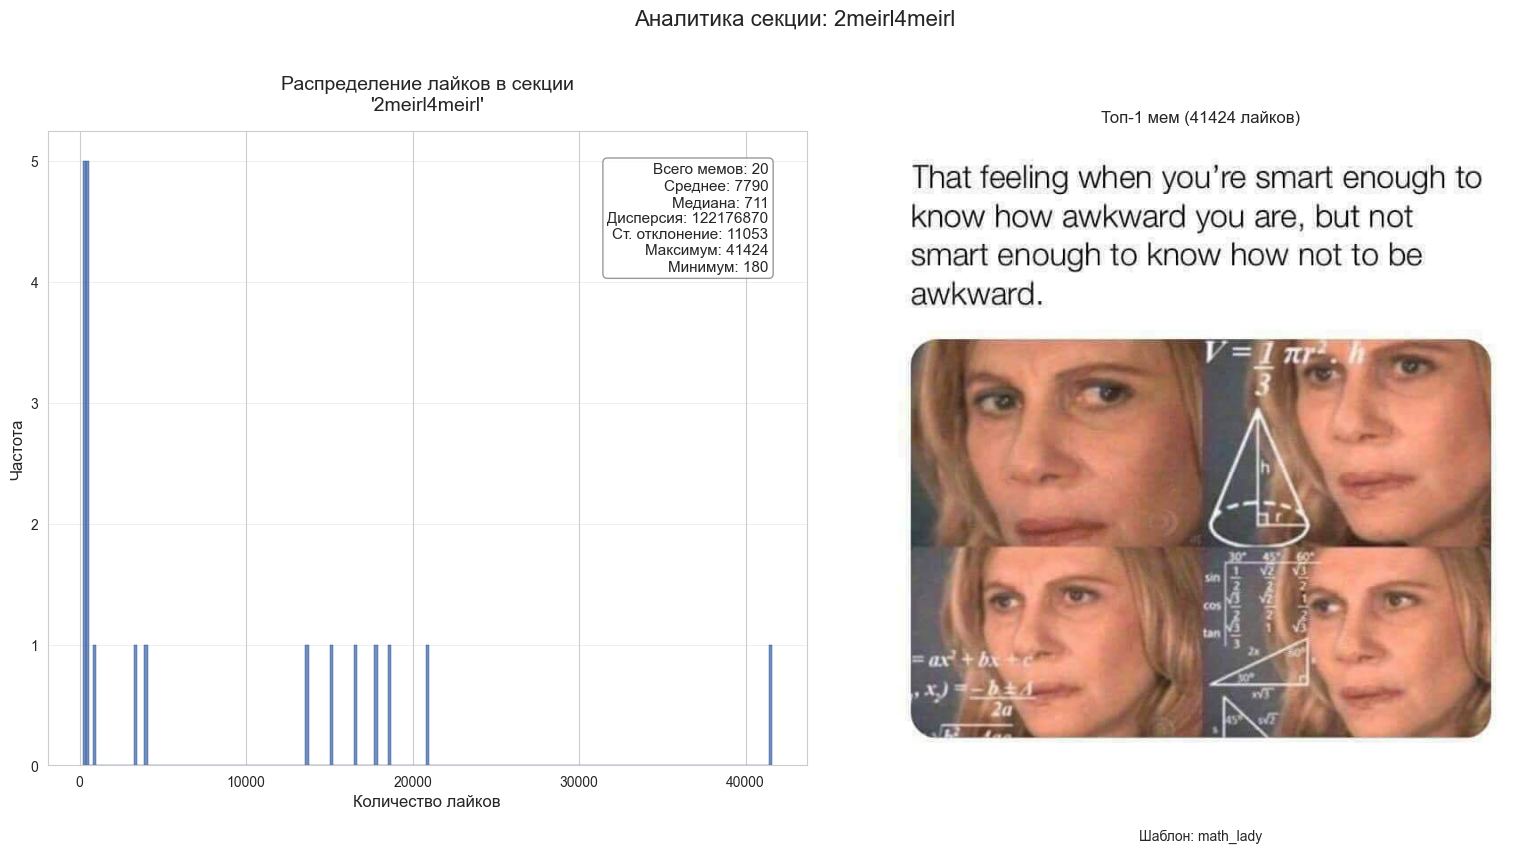

In [5]:
df['section'] = df['section'].fillna('unknown')
df = df[df['score'] >= 2]
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df = df.dropna(subset=['score'])
sections = sorted(df['section'].unique())
section_dropdown = widgets.Dropdown(
    options=sections,
    description='Секция:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def safe_round(value):
    """Безопасное округление с обработкой NaN"""
    try:
        return int(round(value)) if not pd.isna(value) else 0
    except:
        return 0

def plot_section_distribution(section):
    clear_output(wait=True)
    display(section_dropdown)
    
    section_data = df[df['section'] == section]
    scores = section_data['score']
    if len(scores) == 0:
        print(f"Нет данных для секции: {section}")
        return
    plt.figure(figsize=(16, 8))
    sns.set_style("whitegrid")
    plt.subplot(1, 2, 1)
    try:
        bin_size = max(1, int((scores.max() - scores.min()) / 200))
        bins = np.arange(scores.min(), scores.max() + bin_size, bin_size)
    except:
        bins = 50
    sns.histplot(scores, bins=bins, kde=False, color='#4c72b0', 
                edgecolor='#2a4d8c', linewidth=0.3, alpha=0.8)
    
    plt.title(f"Распределение лайков в секции\n'{section}'", fontsize=14, pad=15)
    plt.xlabel("Количество лайков", fontsize=12)
    plt.ylabel("Частота", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    stats = {
        'Всего мемов': len(scores),
        'Среднее': safe_round(scores.mean()),
        'Медиана': safe_round(scores.median()),
        'Дисперсия': safe_round(scores.var()),
        'Ст. отклонение': safe_round(scores.std()),
        'Максимум': safe_round(scores.max()),
        'Минимум': max(0, safe_round(scores.min()))
    }
    
    stats_text = "\n".join([f"{k}: {v}" for k, v in stats.items()])
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                  ha='right', va='top', fontsize=11,
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
    plt.subplot(1, 2, 2)
    
    try:
        top_meme = section_data.nlargest(1, 'score').iloc[0]
        image_path = os.path.join(top_meme['dataset'], top_meme['label'], top_meme['image'])
        
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.title(f"Топ-1 мем ({safe_round(top_meme['score'])} лайков)", fontsize=12)
            plt.axis('off')
            meme_info = []
            if 'date' in df.columns and pd.notna(top_meme['date']):
                meme_info.append(f"Дата: {top_meme['date']}")
            if 'label' in df.columns and pd.notna(top_meme['label']):
                meme_info.append(f"Шаблон: {top_meme['label']}")
            if 'author' in df.columns and pd.notna(top_meme['author']):
                meme_info.append(f"Автор: {top_meme['author']}")
            
            if meme_info:
                plt.gca().text(0.5, -0.1, "\n".join(meme_info), 
                              transform=plt.gca().transAxes,
                              ha='center', va='top', fontsize=10)
        else:
            plt.text(0.5, 0.5, f"Изображение не найдено:\n{image_path}", 
                    ha='center', va='center')
            plt.axis('off')
    except Exception as e:
        plt.text(0.5, 0.5, f"Ошибка при загрузке мема:\n{str(e)}", 
                ha='center', va='center')
        plt.axis('off')
    
    plt.suptitle(f"Аналитика секции: {section}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
section_dropdown.observe(lambda change: plot_section_distribution(change['new']), names='value')
display(section_dropdown)
plot_section_distribution(section_dropdown.value)

Dropdown(description='Секция:', layout=Layout(width='50%'), options=('2meirl4meirl', '4PanelCringe', 'AdviceAn…

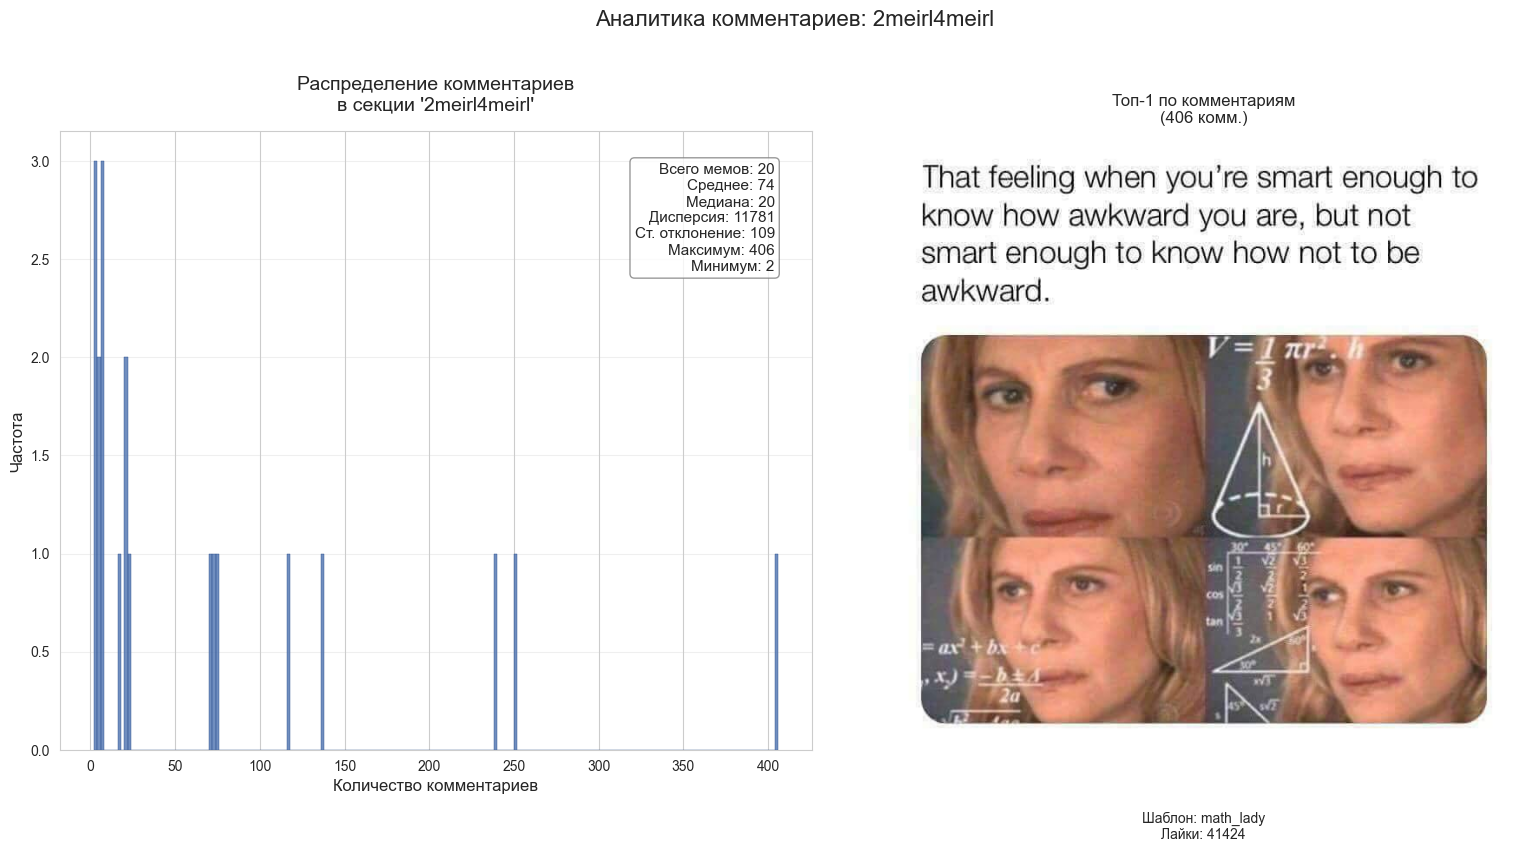

In [6]:
df['section'] = df['section'].fillna('unknown')
df = df[df['ncoms'] >= 1]
df['ncoms'] = pd.to_numeric(df['ncoms'], errors='coerce')
df = df.dropna(subset=['ncoms'])
sections = sorted(df['section'].unique())
section_dropdown = widgets.Dropdown(
    options=sections,
    description='Секция:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def safe_round(value):
    """Безопасное округление с обработкой NaN"""
    try:
        return int(round(value)) if not pd.isna(value) else 0
    except:
        return 0

def plot_section_comments(section):
    clear_output(wait=True)
    display(section_dropdown)
    
    section_data = df[df['section'] == section]
    comments = section_data['ncoms']
    if len(comments) == 0:
        print(f"Нет данных для секции: {section}")
        return
    plt.figure(figsize=(16, 8))
    sns.set_style("whitegrid")
    plt.subplot(1, 2, 1)
    try:
        bin_size = max(1, int((comments.max() - comments.min()) / 200))
        bins = np.arange(comments.min(), comments.max() + bin_size, bin_size)
    except:
        bins = 50
    sns.histplot(comments, bins=bins, kde=False, color='#4c72b0', 
                edgecolor='#2a4d8c', linewidth=0.3, alpha=0.8)
    
    plt.title(f"Распределение комментариев\nв секции '{section}'", fontsize=14, pad=15)
    plt.xlabel("Количество комментариев", fontsize=12)
    plt.ylabel("Частота", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    stats = {
        'Всего мемов': len(comments),
        'Среднее': safe_round(comments.mean()),
        'Медиана': safe_round(comments.median()),
        'Дисперсия': safe_round(comments.var()),
        'Ст. отклонение': safe_round(comments.std()),
        'Максимум': safe_round(comments.max()),
        'Минимум': max(0, safe_round(comments.min()))
    }
    
    stats_text = "\n".join([f"{k}: {v}" for k, v in stats.items()])
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                  ha='right', va='top', fontsize=11,
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
    plt.subplot(1, 2, 2)
    
    try:
        top_meme = section_data.nlargest(1, 'ncoms').iloc[0]
        image_path = os.path.join(top_meme['dataset'], top_meme['label'], top_meme['image'])
        
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.title(f"Топ-1 по комментариям\n({safe_round(top_meme['ncoms'])} комм.)", fontsize=12)
            plt.axis('off')
            meme_info = []
            if 'date' in df.columns and pd.notna(top_meme['date']):
                meme_info.append(f"Дата: {top_meme['date']}")
            if 'label' in df.columns and pd.notna(top_meme['label']):
                meme_info.append(f"Шаблон: {top_meme['label']}")
            if 'score' in df.columns and pd.notna(top_meme['score']):
                meme_info.append(f"Лайки: {safe_round(top_meme['score'])}")
            
            if meme_info:
                plt.gca().text(0.5, -0.1, "\n".join(meme_info), 
                              transform=plt.gca().transAxes,
                              ha='center', va='top', fontsize=10)
        else:
            plt.text(0.5, 0.5, f"Изображение не найдено:\n{image_path}", 
                    ha='center', va='center')
            plt.axis('off')
    except Exception as e:
        plt.text(0.5, 0.5, f"Ошибка при загрузке мема:\n{str(e)}", 
                ha='center', va='center')
        plt.axis('off')
    
    plt.suptitle(f"Аналитика комментариев: {section}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
section_dropdown.observe(lambda change: plot_section_comments(change['new']), names='value')
display(section_dropdown)
plot_section_comments(section_dropdown.value)

Dropdown(description='Секция:', layout=Layout(width='50%'), options=('2meirl4meirl', '4PanelCringe', 'AdviceAn…

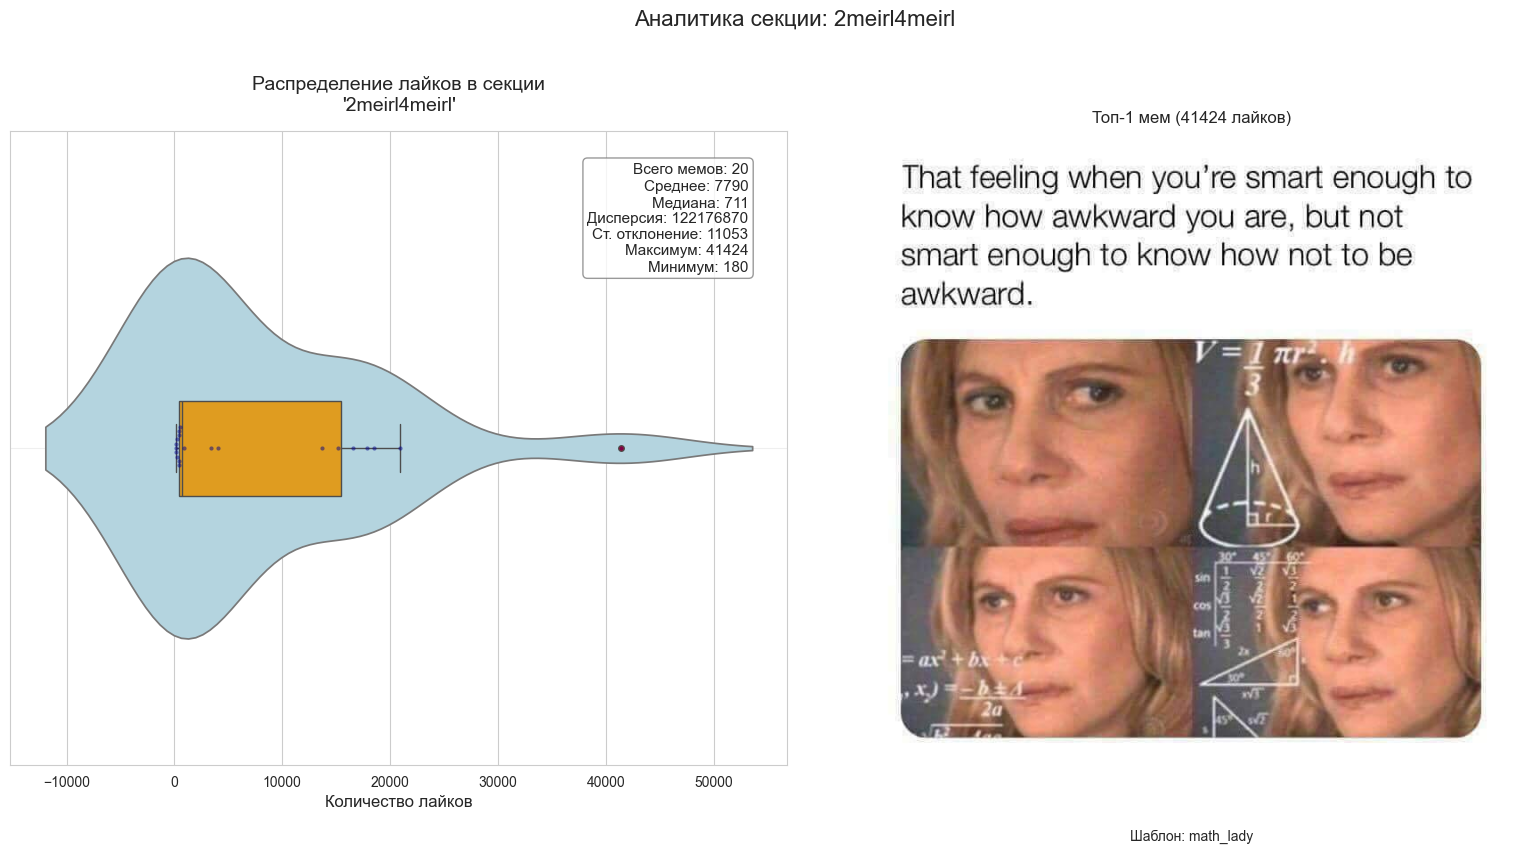

In [7]:
df['section'] = df['section'].fillna('unknown')
df = df[df['score'] >= 2]
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df = df.dropna(subset=['score'])
sections = sorted(df['section'].unique())
section_dropdown = widgets.Dropdown(
    options=sections,
    description='Секция:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def safe_round(value):
    """Безопасное округление с обработкой NaN"""
    try:
        return int(round(value)) if not pd.isna(value) else 0
    except:
        return 0

def plot_section_distribution(section):
    clear_output(wait=True)
    display(section_dropdown)
    
    section_data = df[df['section'] == section]
    scores = section_data['score']
    
    if len(scores) == 0:
        print(f"Нет данных для секции: {section}")
        return
    plt.figure(figsize=(16, 8))
    sns.set_style("whitegrid")
    plt.subplot(1, 2, 1)
    sns.violinplot(x=scores, color='lightblue', inner=None, width=0.6)
    if len(scores) < 1000:
        sns.swarmplot(x=scores, color='darkblue', size=3, alpha=0.5)
    sns.boxplot(x=scores, width=0.15, color='orange', 
               flierprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': 'red'})
    
    plt.title(f"Распределение лайков в секции\n'{section}'", fontsize=14, pad=15)
    plt.xlabel("Количество лайков", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    stats = {
        'Всего мемов': len(scores),
        'Среднее': safe_round(scores.mean()),
        'Медиана': safe_round(scores.median()),
        'Дисперсия': safe_round(scores.var()),
        'Ст. отклонение': safe_round(scores.std()),
        'Максимум': safe_round(scores.max()),
        'Минимум': max(0, safe_round(scores.min()))
    }
    
    stats_text = "\n".join([f"{k}: {v}" for k, v in stats.items()])
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                  ha='right', va='top', fontsize=11,
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
    plt.subplot(1, 2, 2)
    
    try:
        top_meme = section_data.nlargest(1, 'score').iloc[0]
        image_path = os.path.join(top_meme['dataset'], top_meme['label'], top_meme['image'])
        
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.title(f"Топ-1 мем ({safe_round(top_meme['score'])} лайков)", fontsize=12)
            plt.axis('off')
            
            meme_info = []
            if 'date' in df.columns and pd.notna(top_meme['date']):
                meme_info.append(f"Дата: {top_meme['date']}")
            if 'label' in df.columns and pd.notna(top_meme['label']):
                meme_info.append(f"Шаблон: {top_meme['label']}")
            if 'author' in df.columns and pd.notna(top_meme['author']):
                meme_info.append(f"Автор: {top_meme['author']}")
            
            if meme_info:
                plt.gca().text(0.5, -0.1, "\n".join(meme_info), 
                              transform=plt.gca().transAxes,
                              ha='center', va='top', fontsize=10)
        else:
            plt.text(0.5, 0.5, f"Изображение не найдено:\n{image_path}", 
                    ha='center', va='center')
            plt.axis('off')
    except Exception as e:
        plt.text(0.5, 0.5, f"Ошибка при загрузке мема:\n{str(e)}", 
                ha='center', va='center')
        plt.axis('off')
    
    plt.suptitle(f"Аналитика секции: {section}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
section_dropdown.observe(lambda change: plot_section_distribution(change['new']), names='value')
display(section_dropdown)
plot_section_distribution(section_dropdown.value)

Dropdown(description='Категория:', layout=Layout(width='50%'), options=('10_guy', 'advice_mallard', 'afraid_to…

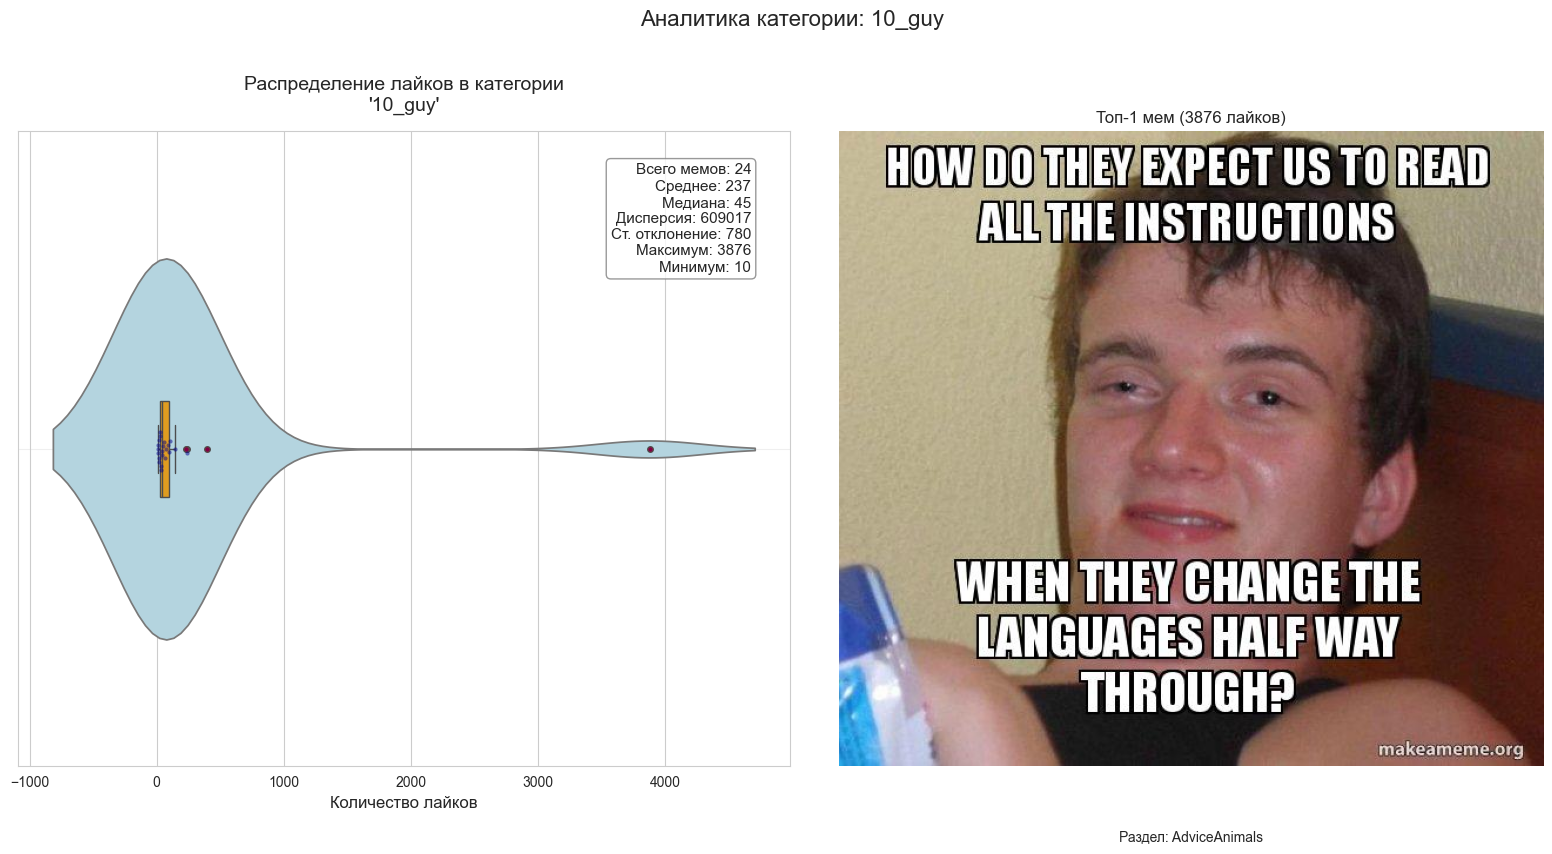

In [8]:
df['label'] = df['label'].fillna('unknown')
df = df[df['score'] >= 2]
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df = df.dropna(subset=['score', 'label'])
labels = sorted(df['label'].unique())
label_dropdown = widgets.Dropdown(
    options=labels,
    description='Категория:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def safe_round(value):
    """Безопасное округление с обработкой NaN"""
    try:
        return int(round(value)) if not pd.isna(value) else 0
    except:
        return 0

def plot_label_distribution(label):
    clear_output(wait=True)
    display(label_dropdown)
    
    label_data = df[df['label'] == label]
    scores = label_data['score']
    
    if len(scores) == 0:
        print(f"Нет данных для категории: {label}")
        return
    plt.figure(figsize=(16, 8))
    sns.set_style("whitegrid")
    plt.subplot(1, 2, 1)
    sns.violinplot(x=scores, color='lightblue', inner=None, width=0.6)
    if len(scores) < 1000:
        sns.swarmplot(x=scores, color='darkblue', size=3, alpha=0.5)
    sns.boxplot(x=scores, width=0.15, color='orange',
               flierprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': 'red'})
    
    plt.title(f"Распределение лайков в категории\n'{label}'", fontsize=14, pad=15)
    plt.xlabel("Количество лайков", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    stats = {
        'Всего мемов': len(scores),
        'Среднее': safe_round(scores.mean()),
        'Медиана': safe_round(scores.median()),
        'Дисперсия': safe_round(scores.var()),
        'Ст. отклонение': safe_round(scores.std()),
        'Максимум': safe_round(scores.max()),
        'Минимум': max(0, safe_round(scores.min()))
    }
    
    stats_text = "\n".join([f"{k}: {v}" for k, v in stats.items()])
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                  ha='right', va='top', fontsize=11,
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
    plt.subplot(1, 2, 2)
    
    try:
        top_meme = label_data.nlargest(1, 'score').iloc[0]
        image_path = os.path.join(top_meme['dataset'], top_meme['label'], top_meme['image'])
        
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.title(f"Топ-1 мем ({safe_round(top_meme['score'])} лайков)", fontsize=12)
            plt.axis('off')
            meme_info = []
            if 'section' in df.columns and pd.notna(top_meme['section']):
                meme_info.append(f"Раздел: {top_meme['section']}")
            if 'date' in df.columns and pd.notna(top_meme['date']):
                meme_info.append(f"Дата: {top_meme['date']}")
            if 'author' in df.columns and pd.notna(top_meme['author']):
                meme_info.append(f"Автор: {top_meme['author']}")
            
            if meme_info:
                plt.gca().text(0.5, -0.1, "\n".join(meme_info), 
                              transform=plt.gca().transAxes,
                              ha='center', va='top', fontsize=10)
        else:
            plt.text(0.5, 0.5, f"Изображение не найдено:\n{image_path}", 
                    ha='center', va='center')
            plt.axis('off')
    except Exception as e:
        plt.text(0.5, 0.5, f"Ошибка при загрузке мема:\n{str(e)}", 
                ha='center', va='center')
        plt.axis('off')
    
    plt.suptitle(f"Аналитика категории: {label}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
label_dropdown.observe(lambda change: plot_label_distribution(change['new']), names='value')
display(label_dropdown)
plot_label_distribution(label_dropdown.value)

Dropdown(description='Категория:', layout=Layout(width='50%'), options=('10_guy', 'advice_mallard', 'afraid_to…

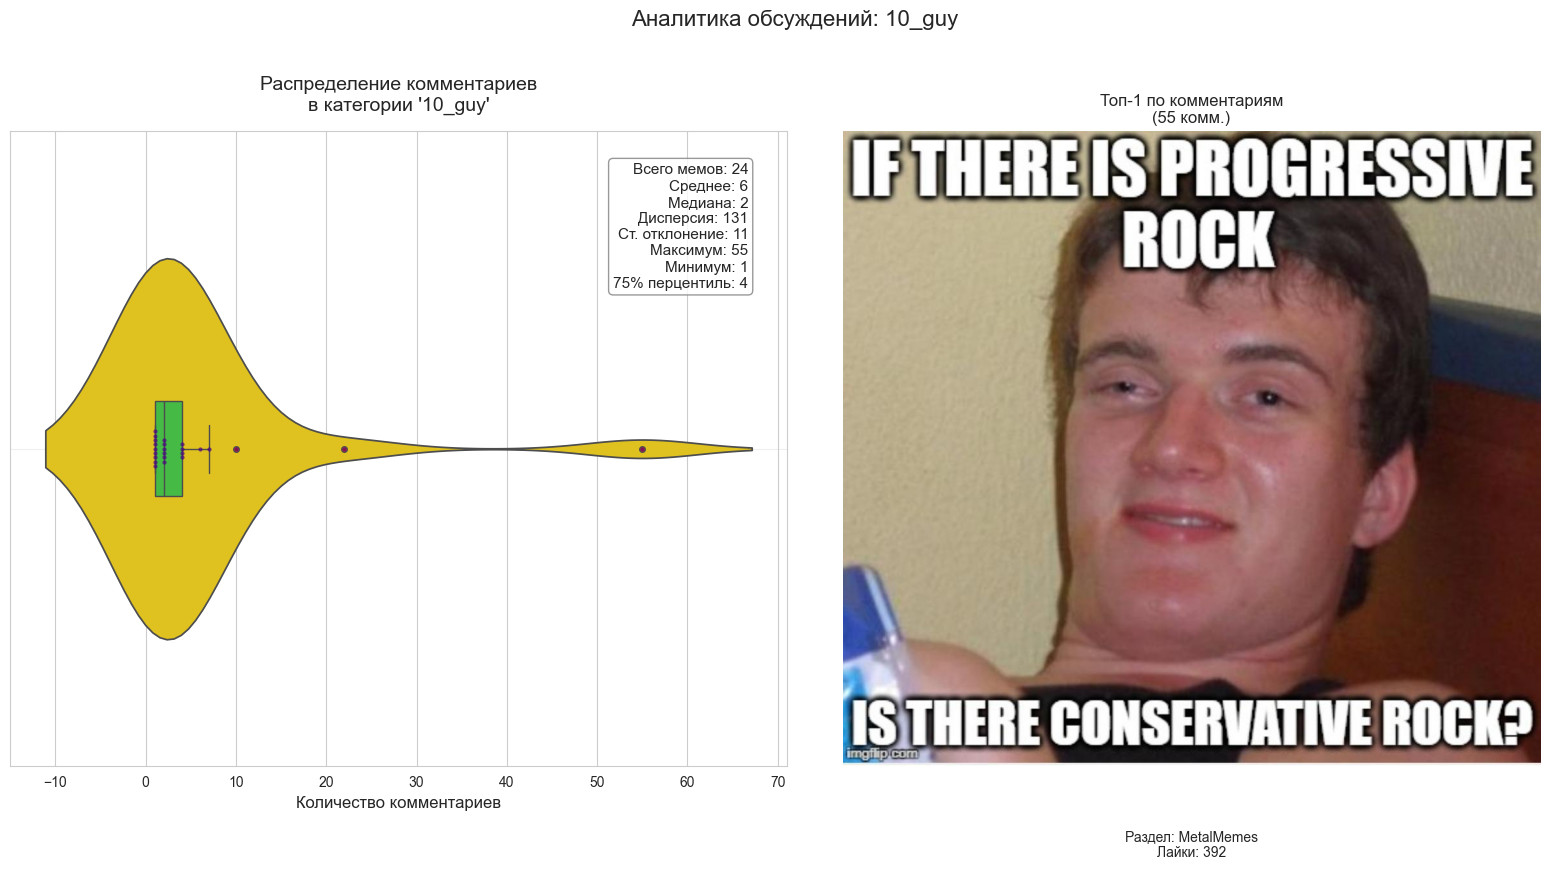

In [10]:
df['label'] = df['label'].fillna('unknown')
df['ncoms'] = pd.to_numeric(df['ncoms'], errors='coerce')
df = df[df['ncoms'] >= 0]
df = df.dropna(subset=['ncoms', 'label'])
labels = sorted(df['label'].unique())
label_dropdown = widgets.Dropdown(
    options=labels,
    description='Категория:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def safe_round(value):
    """Безопасное округление с обработкой NaN"""
    try:
        return int(round(value)) if not pd.isna(value) else 0
    except:
        return 0

def plot_label_comments(label):
    clear_output(wait=True)
    display(label_dropdown)
    
    label_data = df[df['label'] == label]
    comments = label_data['ncoms']
    
    if len(comments) == 0:
        print(f"Нет данных для категории: {label}")
        return
    plt.figure(figsize=(16, 8))
    sns.set_style("whitegrid")
    plt.subplot(1, 2, 1)
    sns.violinplot(x=comments, color='#FFD700', inner=None, width=0.6)
    if len(comments) < 1000:
        sns.swarmplot(x=comments, color='#4B0082', size=3, alpha=0.7)
    sns.boxplot(x=comments, width=0.15, color='#32CD32',
               flierprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': '#FF4500'})
    
    plt.title(f"Распределение комментариев\nв категории '{label}'", fontsize=14, pad=15)
    plt.xlabel("Количество комментариев", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    stats = {
        'Всего мемов': len(comments),
        'Среднее': safe_round(comments.mean()),
        'Медиана': safe_round(comments.median()),
        'Дисперсия': safe_round(comments.var()),
        'Ст. отклонение': safe_round(comments.std()),
        'Максимум': safe_round(comments.max()),
        'Минимум': max(0, safe_round(comments.min())),
        '75% перцентиль': safe_round(comments.quantile(0.75))
    }
    
    stats_text = "\n".join([f"{k}: {v}" for k, v in stats.items()])
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                  ha='right', va='top', fontsize=11,
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
    plt.subplot(1, 2, 2)
    
    try:
        top_meme = label_data.nlargest(1, 'ncoms').iloc[0]
        image_path = os.path.join(top_meme['dataset'], top_meme['label'], top_meme['image'])
        
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.title(f"Топ-1 по комментариям\n({safe_round(top_meme['ncoms'])} комм.)", fontsize=12)
            plt.axis('off')
            meme_info = []
            if 'section' in df.columns and pd.notna(top_meme['section']):
                meme_info.append(f"Раздел: {top_meme['section']}")
            if 'date' in df.columns and pd.notna(top_meme['date']):
                meme_info.append(f"Дата: {top_meme['date']}")
            if 'score' in df.columns and pd.notna(top_meme['score']):
                meme_info.append(f"Лайки: {safe_round(top_meme['score'])}")
            
            if meme_info:
                plt.gca().text(0.5, -0.1, "\n".join(meme_info), 
                              transform=plt.gca().transAxes,
                              ha='center', va='top', fontsize=10)
        else:
            plt.text(0.5, 0.5, f"Изображение не найдено:\n{image_path}", 
                    ha='center', va='center')
            plt.axis('off')
    except Exception as e:
        plt.text(0.5, 0.5, f"Ошибка при загрузке мема:\n{str(e)}", 
                ha='center', va='center')
        plt.axis('off')
    
    plt.suptitle(f"Аналитика обсуждений: {label}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
label_dropdown.observe(lambda change: plot_label_comments(change['new']), names='value')
display(label_dropdown)
plot_label_comments(label_dropdown.value)

Dropdown(description='Раздел:', layout=Layout(width='50%'), options=('2meirl4meirl', '4PanelCringe', 'AdviceAn…

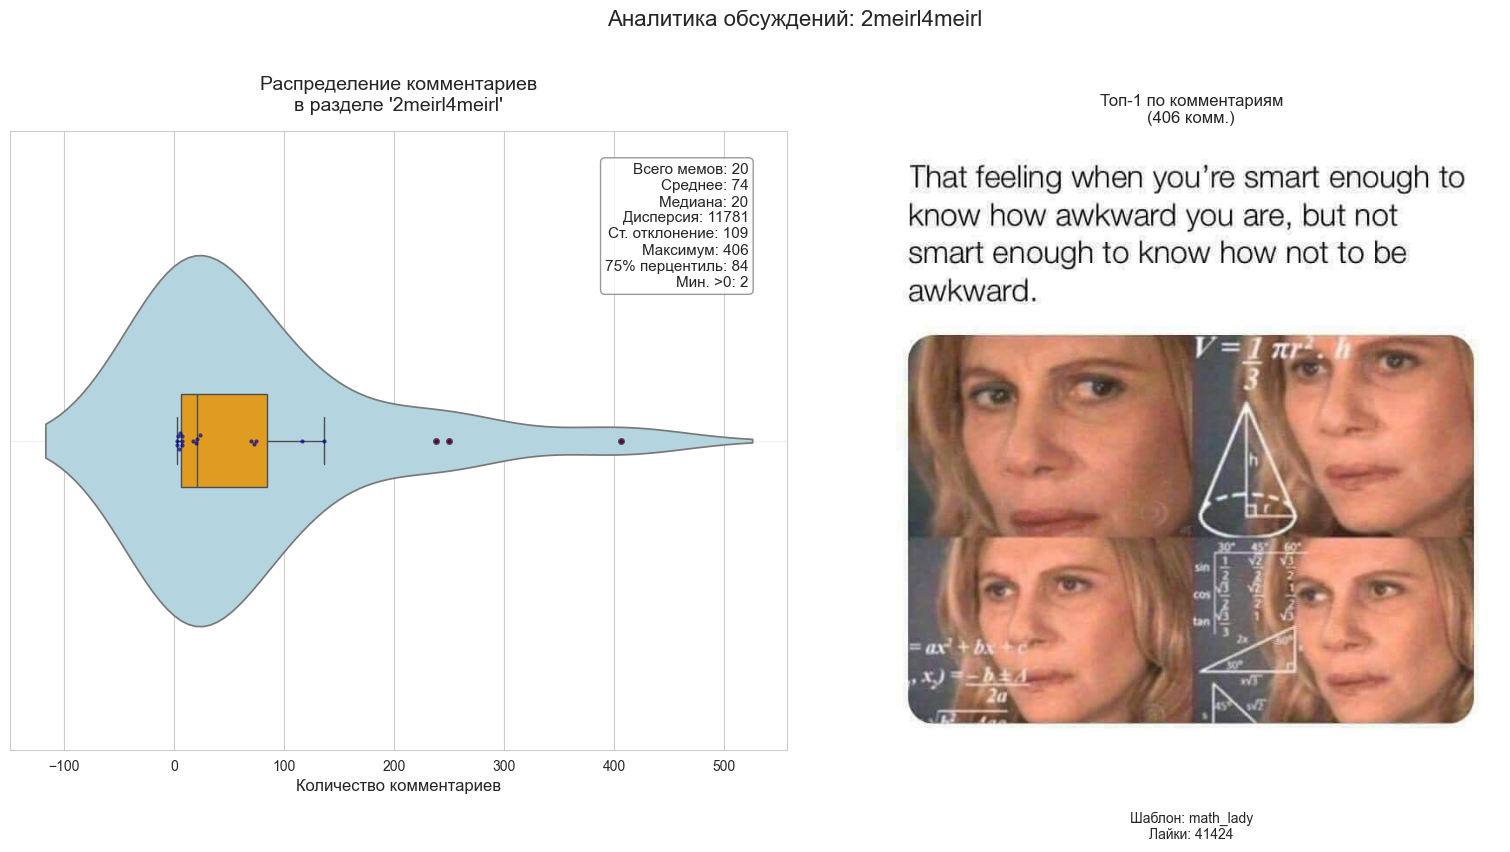

In [11]:
df['section'] = df['section'].fillna('unknown')
df['ncoms'] = pd.to_numeric(df['ncoms'], errors='coerce')
df = df[df['ncoms'] >= 0]
df = df.dropna(subset=['ncoms', 'section'])
sections = sorted(df['section'].unique())
section_dropdown = widgets.Dropdown(
    options=sections,
    description='Раздел:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def safe_round(value):
    """Безопасное округление с обработкой NaN"""
    try:
        return int(round(value)) if not pd.isna(value) else 0
    except:
        return 0

def plot_section_comments(section):
    clear_output(wait=True)
    display(section_dropdown)
    
    section_data = df[df['section'] == section]
    comments = section_data['ncoms']
    
    if len(comments) == 0:
        print(f"Нет данных для раздела: {section}")
        return
    plt.figure(figsize=(16, 8))
    sns.set_style("whitegrid")
    plt.subplot(1, 2, 1)
    sns.violinplot(x=comments, color='#ADD8E6', inner=None, width=0.6)
    if len(comments) < 1000:
        sns.swarmplot(x=comments, color='#00008B', size=3, alpha=0.7)
    sns.boxplot(x=comments, width=0.15, color='orange',
               flierprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': 'red'})
    
    plt.title(f"Распределение комментариев\nв разделе '{section}'", fontsize=14, pad=15)
    plt.xlabel("Количество комментариев", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    stats = {
        'Всего мемов': len(comments),
        'Среднее': safe_round(comments.mean()),
        'Медиана': safe_round(comments.median()),
        'Дисперсия': safe_round(comments.var()),
        'Ст. отклонение': safe_round(comments.std()),
        'Максимум': safe_round(comments.max()),
        '75% перцентиль': safe_round(comments.quantile(0.75)),
        'Мин. >0': safe_round(comments[comments > 0].min()) if any(comments > 0) else 0
    }
    
    stats_text = "\n".join([f"{k}: {v}" for k, v in stats.items()])
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                  ha='right', va='top', fontsize=11,
                  bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'))
    plt.subplot(1, 2, 2)
    
    try:
        top_meme = section_data.nlargest(1, 'ncoms').iloc[0]
        image_path = os.path.join(top_meme['dataset'], top_meme['label'], top_meme['image'])
        
        if os.path.exists(image_path):
            img = plt.imread(image_path)
            plt.imshow(img)
            plt.title(f"Топ-1 по комментариям\n({safe_round(top_meme['ncoms'])} комм.)", fontsize=12)
            plt.axis('off')
            meme_info = []
            if 'label' in df.columns and pd.notna(top_meme['label']):
                meme_info.append(f"Шаблон: {top_meme['label']}")
            if 'date' in df.columns and pd.notna(top_meme['date']):
                meme_info.append(f"Дата: {top_meme['date']}")
            if 'score' in df.columns and pd.notna(top_meme['score']):
                meme_info.append(f"Лайки: {safe_round(top_meme['score'])}")
            
            if meme_info:
                plt.gca().text(0.5, -0.1, "\n".join(meme_info), 
                              transform=plt.gca().transAxes,
                              ha='center', va='top', fontsize=10)
        else:
            plt.text(0.5, 0.5, f"Изображение не найдено:\n{image_path}", 
                    ha='center', va='center')
            plt.axis('off')
    except Exception as e:
        plt.text(0.5, 0.5, f"Ошибка при загрузке мема:\n{str(e)}", 
                ha='center', va='center')
        plt.axis('off')
    
    plt.suptitle(f"Аналитика обсуждений: {section}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
section_dropdown.observe(lambda change: plot_section_comments(change['new']), names='value')
display(section_dropdown)
plot_section_comments(section_dropdown.value)

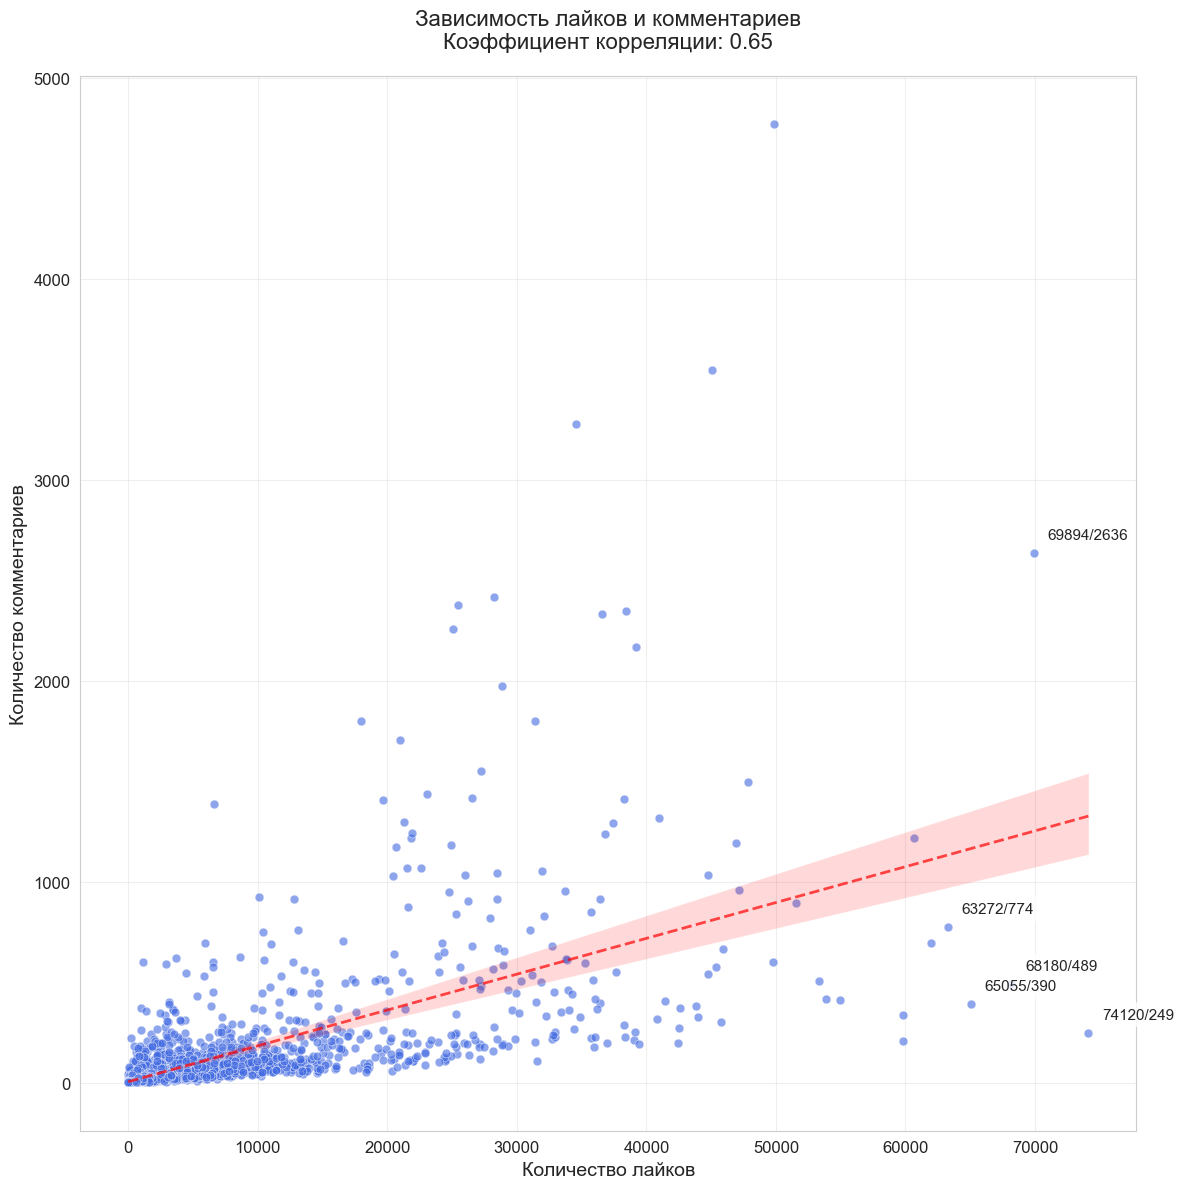

In [12]:
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df['ncoms'] = pd.to_numeric(df['ncoms'], errors='coerce')
df = df.dropna(subset=['score', 'ncoms'])

# Создаем график с увеличенной высотой
plt.figure(figsize=(12, 12))  # Увеличили высоту до 10 дюймов
sns.set_style("whitegrid")

# Основной scatter plot
scatter = sns.scatterplot(
    x='score',
    y='ncoms',
    data=df,
    color='royalblue',  # Единый цвет для всех точек
    s=40,              # Размер точек
    alpha=0.6,         # Прозрачность
    edgecolor='w',     # Белая граница
    linewidth=0.5
)

# Линия регрессии
sns.regplot(
    x='score',
    y='ncoms',
    data=df,
    scatter=False,
    color='red',
    line_kws={'linestyle': '--', 'alpha': 0.7, 'linewidth': 2}
)
corr = df[['score', 'ncoms']].corr().iloc[0,1]
plt.title(f"Зависимость лайков и комментариев\nКоэффициент корреляции: {corr:.2f}", 
          fontsize=16, pad=20)
plt.xlabel("Количество лайков", fontsize=14)
plt.ylabel("Количество комментариев", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
top_memes = df.nlargest(5, 'score')
for _, row in top_memes.iterrows():
    plt.annotate(
        f"{int(row['score'])}/{int(row['ncoms'])}",
        (row['score'], row['ncoms']),
        textcoords="offset points",
        xytext=(10, 10),
        ha='left',
        fontsize=11,
        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8)
    )

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [1]:
df['score'] = pd.to_numeric(df['score'], errors='coerce')
df['ncoms'] = pd.to_numeric(df['ncoms'], errors='coerce')
df = df.dropna(subset=['score', 'ncoms'])

# Создаем график с увеличенной высотой
plt.figure(figsize=(12, 12))  # Увеличили высоту до 10 дюймов
sns.set_style("whitegrid")

# Основной scatter plot
scatter = sns.scatterplot(
    x='score',
    y='ncoms',
    data=df,
    color='royalblue',  # Единый цвет для всех точек
    s=40,              # Размер точек
    alpha=0.6,         # Прозрачность
    edgecolor='w',     # Белая граница
    linewidth=0.5      # Толщина границы
)

# Линия регрессии
sns.regplot(
    x='score',
    y='ncoms',
    data=df,
    scatter=False,
    color='red',
    line_kws={'linestyle': '--', 'alpha': 0.7, 'linewidth': 2}
)
corr = df[['score', 'ncoms']].corr().iloc[0,1]
plt.title(f"Зависимость лайков и комментариев\nКоэффициент корреляции: {corr:.2f}", 
          fontsize=16, pad=20)
plt.xlabel("Количество лайков", fontsize=14)
plt.ylabel("Количество комментариев", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Удален блок с аннотациями точек

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined